# Netflix vs. Disney



* Netflix (NASDAQ:NFLX)
* Disney (NYSE:DIS)


Raw data: overall and individual plots, mean monthly returns, and the covariance and correlation between Netflix and Disney.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import random
from pandas_datareader import data as web

In [2]:
# tickers in a list
symbols = ['NFLX','DIS']
# set dates: 1 year
start_date = "2019-08-13" 
end_date = "2020-08-12" 
# extract data from yahoo
stock_data = web.get_data_yahoo(symbols,start_date,end_date)

# show data
print(stock_data['Adj Close'].head(3)) # choose the Adj Close attribute table and show the first 3 rows

Symbols            DIS        NFLX
Date                              
2019-08-12  134.941528  310.829987
2019-08-13  136.194016  312.279999
2019-08-14  132.058807  299.109985


Symbols            DIS        NFLX
Date                              
2019-08-12  134.941528  310.829987
2019-09-12  136.681107  288.859985
2019-10-11  129.245667  282.929993
2019-11-12  137.754684  292.010010
2019-12-12  146.880005  298.440002
2020-01-13  143.880005  338.920013
2020-02-12  141.850006  380.010010
2020-03-12   91.809998  315.250000
2020-04-13  103.500000  396.720001
2020-05-12  104.559998  431.820007
2020-06-12  115.489998  418.070007
2020-07-13  116.220001  525.500000
2020-08-12  131.789993  475.470001


<Figure size 1440x720 with 0 Axes>

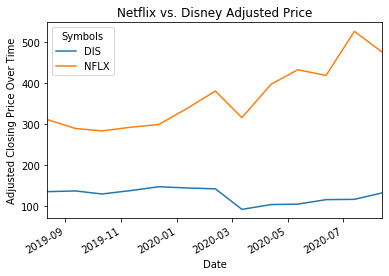

In [3]:
pd.set_option('mode.chained_assignment', None) # ignore warning
# drop all rows if the date is not every month to find monthly share price
stock_data_adj = stock_data['Adj Close'] # Adjusted Close is the most accurate stock price
for index,row in stock_data_adj.iterrows():
    current_date = str(index.date())
    current_date_day = str(index.date())[-2:]
    if(current_date_day == "12"):
        continue
    if(current_date == "2019-10-11" or current_date == "2020-01-13" or current_date == "2020-04-13"
      or current_date == "2020-07-13"):
        continue
    else:
        stock_data_adj.drop(index,inplace = True)

print(stock_data_adj)
plt.figure(figsize = (20,10))
stock_data_adj.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.title("Netflix vs. Disney Adjusted Price")
plt.show()

Symbols          DIS      NFLX
Date                          
2019-08-12       NaN       NaN
2019-09-12  0.012891 -0.070682
2019-10-11 -0.054400 -0.020529
2019-11-12  0.065836  0.032093
2019-12-12  0.066243  0.022020
2020-01-13 -0.020425  0.135639
2020-02-12 -0.014109  0.121238
2020-03-12 -0.352767 -0.170417
2020-04-13  0.127328  0.258430
2020-05-12  0.010242  0.088476
2020-06-12  0.104533 -0.031842
2020-07-13  0.006321  0.256967
2020-08-12  0.133970 -0.095205


<Figure size 1440x720 with 0 Axes>

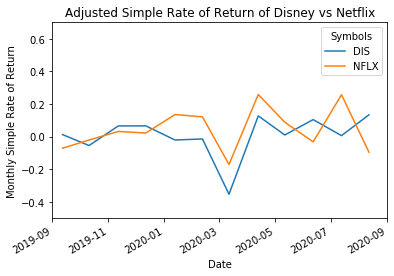

<Figure size 1152x648 with 0 Axes>

In [4]:
monthly_simple_ror = stock_data_adj.pct_change() # calculating monthly returns
print(monthly_simple_ror)
plt.figure(figsize = (20,10))
monthly_simple_ror.plot()
plt.xlabel("Date")
plt.ylabel("Monthly Simple Rate of Return")
plt.title("Adjusted Simple Rate of Return of Disney vs Netflix")
plt.xlim("2019-09","2020-09")
plt.ylim(-0.5,0.7)
plt.figure(figsize=(16,9))
plt.show()

Symbols
DIS     0.007139
NFLX    0.043849
dtype: float64


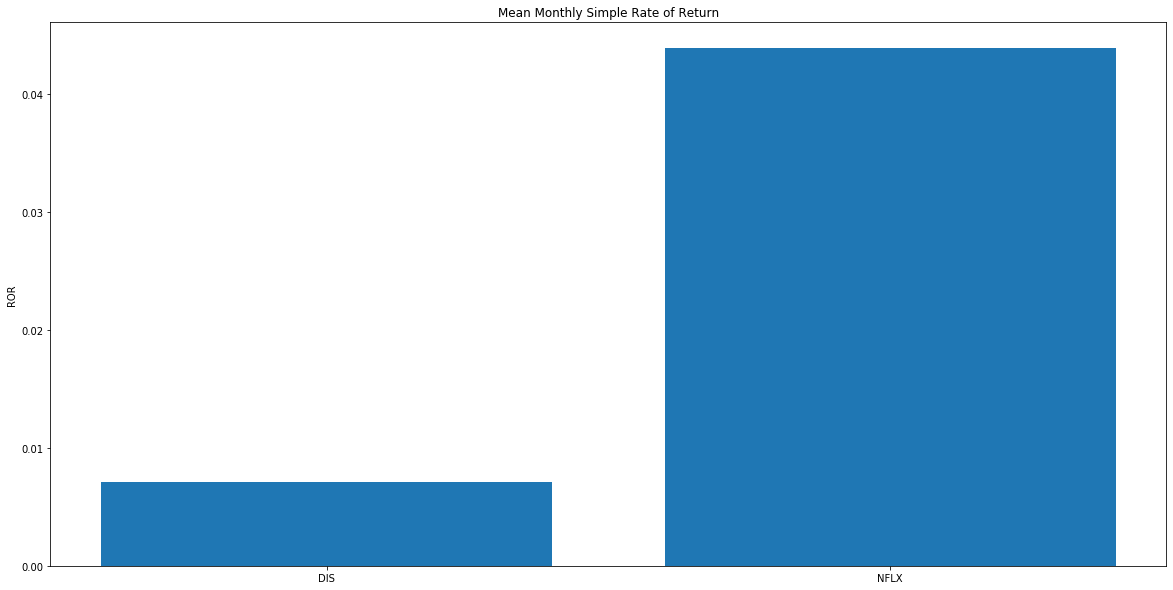

In [5]:
# step 1
mean_return = monthly_simple_ror.mean()
print(mean_return)
# step 2 or use mean_return.keys() as the first bar chart arguement
plt.figure(figsize = (20,10))
plt.bar(mean_return.keys(),mean_return)
plt.ylabel("ROR")
plt.title("Mean Monthly Simple Rate of Return")
plt.show()

Symbols
DIS     0.016503
NFLX    0.017884
dtype: float64


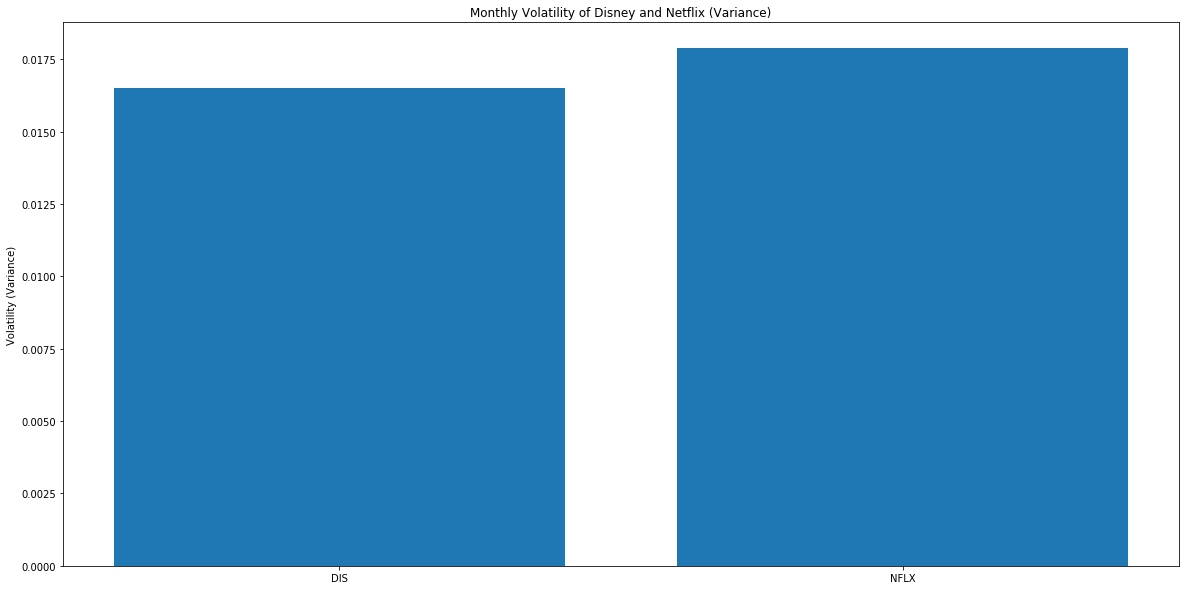

In [6]:
var_return = monthly_simple_ror.var() # calculate monthly variance
print(var_return)
plt.figure(figsize = (20,10))
plt.bar(monthly_simple_ror.keys(),var_return)
plt.title("Monthly Volatility of Disney and Netflix (Variance)")
plt.ylabel("Volatility (Variance)")
plt.show()

Symbols
DIS     0.128463
NFLX    0.133730
dtype: float64


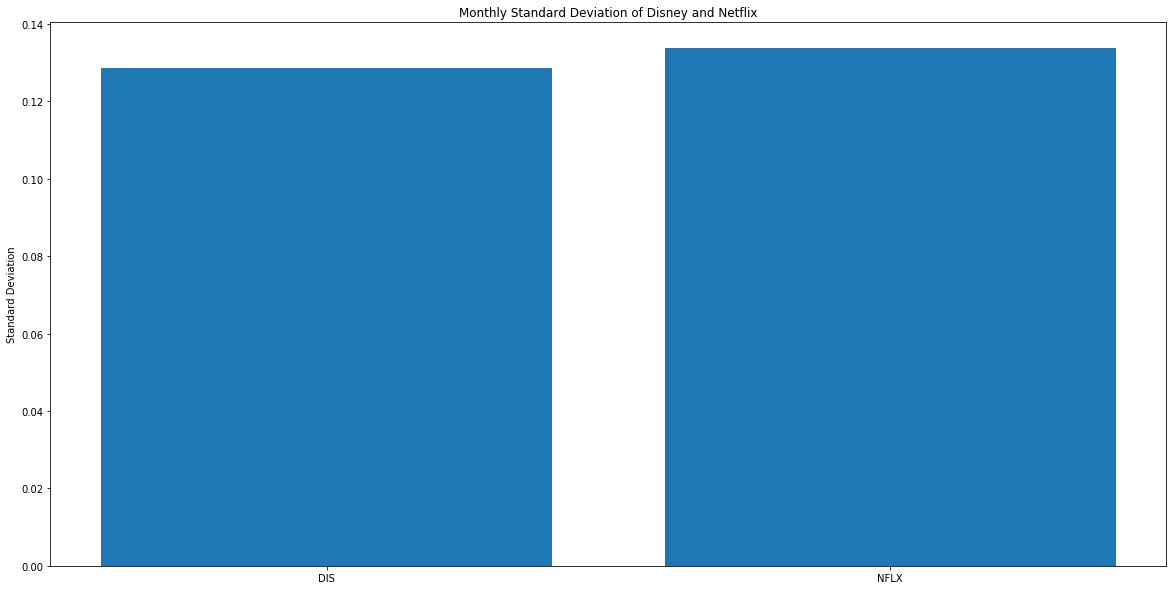

In [7]:
sd_return = monthly_simple_ror.std() # calculate monthly standard deviation
print(sd_return)
plt.figure(figsize = (20,10))
plt.bar(monthly_simple_ror.keys(),sd_return)
plt.title("Monthly Standard Deviation of Disney and Netflix")
plt.ylabel("Standard Deviation")
plt.show()

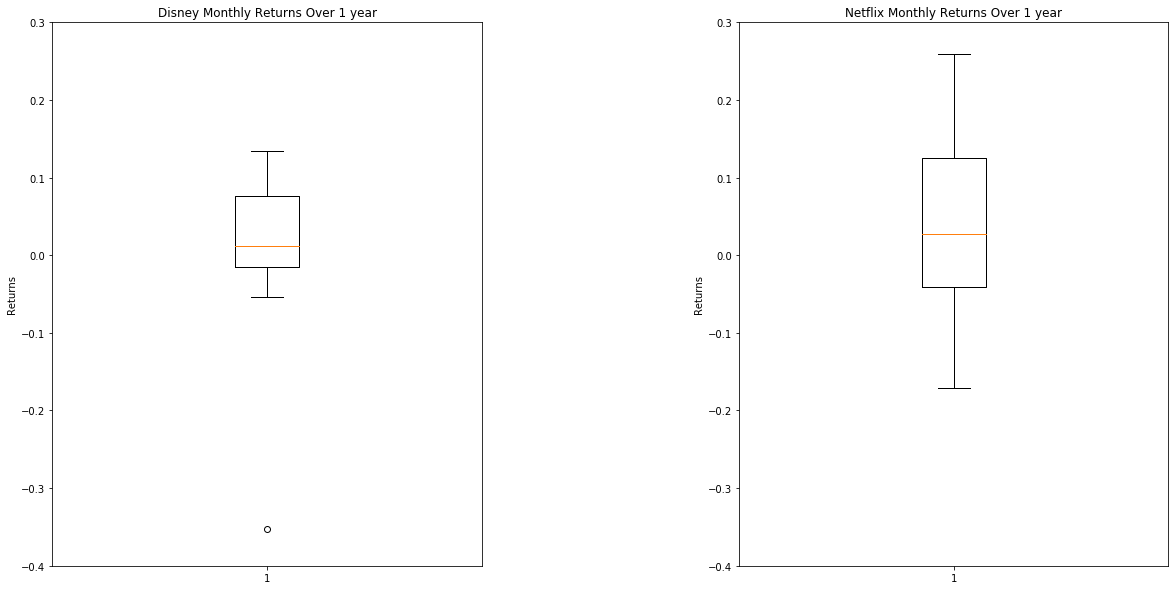

In [8]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.boxplot(monthly_simple_ror['DIS'][1:])
plt.title("Disney Monthly Returns Over 1 year")
plt.ylabel("Returns")
plt.ylim(-0.4,0.3)
plt.subplot(1,2,2)
plt.boxplot(monthly_simple_ror['NFLX'][1:])
plt.title("Netflix Monthly Returns Over 1 year")
plt.ylabel("Returns")
plt.ylim(-0.4,0.3)
plt.subplots_adjust(hspace = 0.3,wspace = 0.6)
plt.show()

In [9]:
cov_matrix = monthly_simple_ror.cov() # covariance matrix
print(cov_matrix)

Symbols       DIS      NFLX
Symbols                    
DIS      0.016503  0.006819
NFLX     0.006819  0.017884


In [10]:
corr_matrix = monthly_simple_ror.corr() # correlation matrix
print(corr_matrix)

Symbols       DIS      NFLX
Symbols                    
DIS      1.000000  0.396935
NFLX     0.396935  1.000000
